In [1]:
import pandas as pd
import numpy as np
from igraph import Graph
import igraph as ig

In [23]:
df_loc = pd.read_csv('resources/club_geolocations.csv')
df_loc = df_loc.set_index('Club Name')

leagues = pd.read_csv('resources/club_league.csv')
indexed_leagues = leagues.set_index('club_name')
major_leagues = ['1 Bundesliga', 'Ligue 1', 'Serie A', 'Eredivisie','Premier League', 'Liga Nos', 'Premier Liga', 'Primera Division']
colors = ['blue', 'red', 'green', 'yellow', 'pink', 'orange', 'gray', 'purple']
color_dict = dict(zip(major_leagues, colors))

In [24]:
for c in color_dict:
    print('{}: {}'.format(color_dict[c],c))

blue: 1 Bundesliga
red: Ligue 1
green: Serie A
yellow: Eredivisie
pink: Premier League
orange: Liga Nos
gray: Premier Liga
purple: Primera Division


In [25]:
indexed_leagues['color'] = [color_dict[l] if l in color_dict.keys() else 'black' for l in indexed_leagues.league_name]

In [26]:
filename = 'nets/2010/fee_net.net'
g = Graph.Load(filename)

In [31]:
nodes = g.vs['name']
coordinates = []
colors = []
for i,n in enumerate(nodes):
    try:
        col = indexed_leagues.loc[n.split('_seller')[0]].color
    except:
        print('missing color:', col)
    try:
        pos = df_loc.loc[n.split('_seller')[0]].values
    except:
        col = colors[-1]
        print('missing coordinate:', n)
    coordinates.append(pos)
    colors.append(col)

missing coordinate: CSKA Sofia_seller
missing coordinate: Sigma Olomouc_seller
missing coordinate: Twente FC_seller
missing coordinate: Sparta R._seller
missing coordinate: Preston NE_seller
missing coordinate: Nottm Forest_seller
missing coordinate: Sheff Wed_seller
missing coordinate: Sheffield Utd._seller
missing coordinate: Grasshoppers_seller
missing coordinate: Dep. La Coruña_seller
missing coordinate: Notts County_seller
missing coordinate: Lech Poznan_seller
missing coordinate: CA Banfield_seller
missing coordinate: ETO FC Győr_seller
missing coordinate: Carlisle United_seller
missing coordinate: Dinamo Tbilisi_seller
missing coordinate: Slavia Prague_seller
missing coordinate: Rad_seller
missing coordinate: R. Strasbourg_seller
missing coordinate: Vit. Guimarães_seller
missing coordinate: Barnet_seller
missing coordinate: Sparta Praha_seller
missing coordinate: G. Bordeaux_seller
missing coordinate: Celtic_seller
missing coordinate: NK Olimpija_seller
missing coordinate: Atlét

In [32]:
layout = ig.Layout(coordinates)

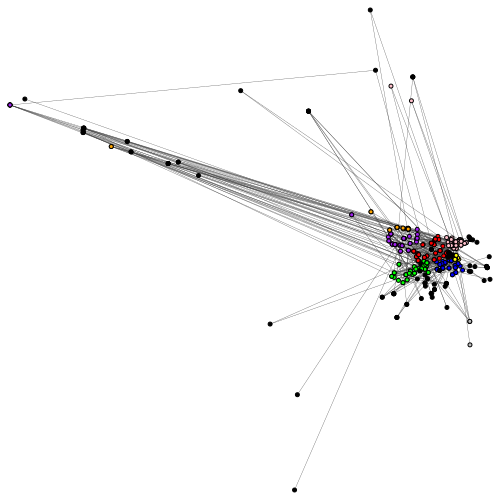

In [33]:
ig.plot(g, layout=layout, vertex_color=colors, vertex_size=4, bbox=(500,500), margin=10, edge_width=0.3, target='plot_2015.png')